In [1]:
# create scicat client

from pyscicat.client import ScicatClient
import os

base_url = os.environ.get('BE_BASE_URL')
username = os.environ.get('USERNAME')
password = os.environ.get('PASSWORD')

client = ScicatClient(base_url=base_url, username=username, password=password)

In [4]:
# create (raw) dataset

from pyscicat.model import Ownable, RawDataset
from datetime import datetime

ownable = Ownable(
    ownerGroup="example_research_group", # only obligatory element of this model
    accessGroups=['group1', 'group2'],
    instrumentGroup='instrument1'
)

dataset = RawDataset(
    contactEmail="example@email.net", # must be valid email in format
    creationTime=datetime(year=2024, month=4, day=12, hour=12, minute=35, second=30).isoformat(),
    datasetName="example_dataset",
    description="You can insert a lengthy description here",
    instrumentId="example.instrument.id",
    isPublished=False,
    keywords=["important", "biology", "example"],
    license="Public Domain",
    numberOfFiles = 6,
    orcidOfOwner="0000-0001-5109-3700",
    owner="Emmett Exemplum, PhD",
    ownerEmail="example.exemplum@some_uni.ch",
    size=589824, # in bytes!
    sourceFolder="/datasets/example_dataset", # this will have to reflect the retrieval location for the archival system 
    #sourceFolderHost="earth.net", # same as above but the network host part (instead of filesystem)
    validationStatus="valid",
    version="4.0.0", # optional
    scientificMetadata={}, # optional
    principalInvestigator="Mr. Irvine Investigator",
    creationLocation="University of Example, Exemplia",
    #dataFormat="someformat", # optional
    sampleId="example.sample.id",
    **ownable.model_dump()
)

# attempt to create dataset, *CAN* throw ScicatCommError
dataset_id = client.datasets_create(dataset)

In [6]:
# Add datablock to dataset

from pyscicat.model import DataFile, CreateDatasetOrigDatablockDto
from datetime import datetime

files = [
    "file1.txt",
    "someimage.raw",
    "thumbnail/someimage.jpg",
    "thumbnail/FoilHoles.jpg",
    "transformations.json",
    "FoilHoles.raw"
]
file_sizes = [
    100,
    204800,
    20480,
    20480,
    1000,
    342964
]
file_times = [
    datetime(year=2024, month=4, day=12, hour=12, minute=35, second=30),
    datetime(year=2024, month=2, day=4, hour=5, minute=56, second=39),
    datetime(year=2024, month=3, day=30, hour=19, minute=4, second=53),
    datetime(year=2024, month=4, day=2, hour=16, minute=25, second=37),
    datetime(year=2024, month=4, day=12, hour=8, minute=13, second=44),
    datetime(year=2024, month=2, day=4, hour=4, minute=24, second=17)
]
dataFileList = [
    DataFile(path=p, size=s, time=t.isoformat()) for (p, s, t) in zip(files, 
                                                                      file_sizes, 
                                                                      file_times)
]

data_block = CreateDatasetOrigDatablockDto(
    size=576, version=1, dataFileList=dataFileList
)

client.datasets_origdatablock_create(dataset_id, data_block)

{'id': 'debe64f2-70fd-4099-9aad-956d80a70bf7',
 'size': 576,
 'ownerGroup': 'example_research_group',
 'accessGroups': ['group1', 'group2'],
 'createdBy': 'admin',
 'datasetId': 'PID.SAMPLE.PREFIX/ffff516a-24e0-425a-a996-ddaeeb3e10e3',
 'dataFileList': [{'path': 'file1.txt',
   'size': 100,
   'time': '2024-04-12T12:35:30.000Z',
   'createdAt': '2024-04-12T13:26:53.187Z'},
  {'path': 'someimage.raw',
   'size': 204800,
   'time': '2024-02-04T05:56:39.000Z',
   'createdAt': '2024-04-12T13:26:53.187Z'},
  {'path': 'thumbnail/someimage.jpg',
   'size': 20480,
   'time': '2024-03-30T19:04:53.000Z',
   'createdAt': '2024-04-12T13:26:53.187Z'},
  {'path': 'thumbnail/FoilHoles.jpg',
   'size': 20480,
   'time': '2024-04-02T16:25:37.000Z',
   'createdAt': '2024-04-12T13:26:53.187Z'},
  {'path': 'transformations.json',
   'size': 1000,
   'time': '2024-04-12T08:13:44.000Z',
   'createdAt': '2024-04-12T13:26:53.187Z'},
  {'path': 'FoilHoles.raw',
   'size': 342964,
   'time': '2024-02-04T04:24:1

{'id': 'd83b433b-5aac-47e0-ad4f-1016cb4a550b',
 'thumbnail': '',
 'caption': 'Example thumbnail image as attachment',
 'ownerGroup': 'example_research_group',
 'accessGroups': ['group1', 'group2'],
 'instrumentGroup': 'instrument1',
 'createdBy': 'admin',
 'datasetId': 'PID.SAMPLE.PREFIX/ffff516a-24e0-425a-a996-ddaeeb3e10e3',
 'createdAt': '2024-04-12T13:27:21.183Z',
 'updatedAt': '2024-04-12T13:27:21.185Z'}
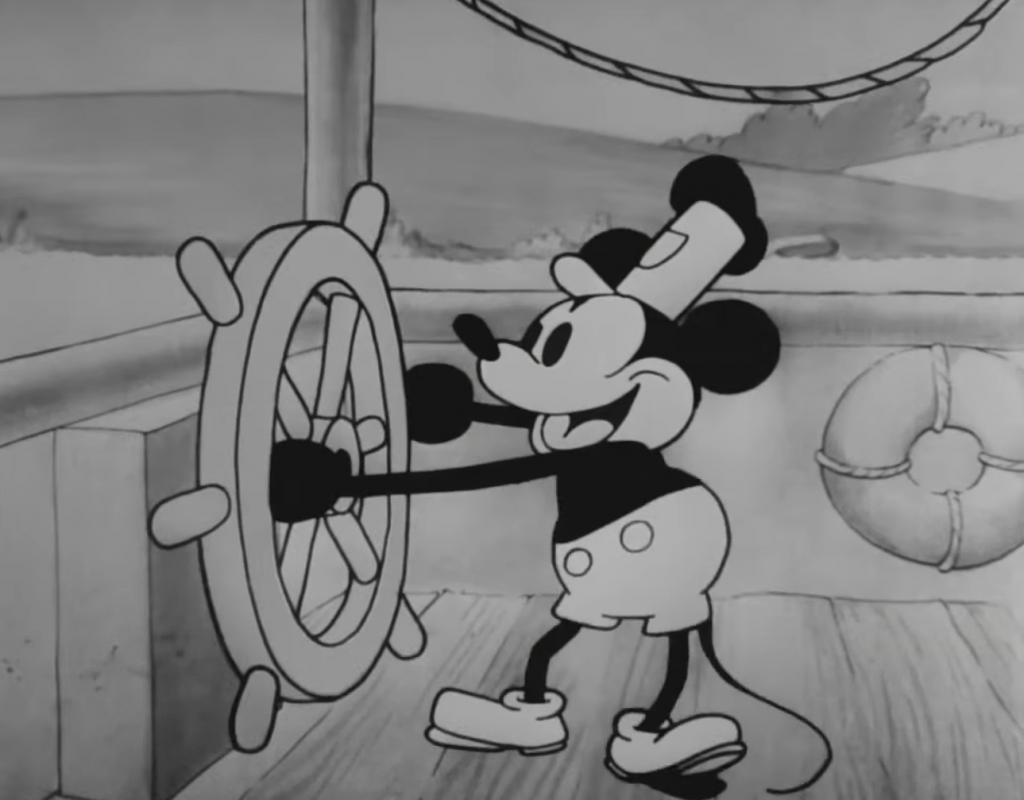

In [7]:
# Upload attachment

from pyscicat.client import encode_thumbnail
from pyscicat.model import Attachment

attachment = Attachment(
    datasetId=dataset_id,
    thumbnail=encode_thumbnail("example_files/thumbnail.png", "png"),
    caption="Example thumbnail image as attachment",
    **ownable.model_dump()
)

client.datasets_attachment_create(attachment)